# Algoritmos de boosting - XGBoost
Dentro de los algoritmos ensamblados tenemos los algoritmos de boosting. Algunos ejemplos de estos algoritmos son el XGBoost o el AdaBoost. En los algoritmos de boosting, los modelos simples son utilizados secuencialmente, es decir, cada modelo simple va delante o detrás de otro modelo simple. El principal objetivo de los métodos secuenciales es el de aprovecharse de la dependencia entre los modelos simples. El rendimiento general puede ser mejorado haciendo que un modelo simple posterior les dé más importancia a los errores cometidos por un modelo simple previo. Poniendo un ejemplo, es como si al intentar resolver un problema se aprovechase el conocimiento de los errores de otros.

Las predicciones de cada modelo simple se combinan por medio de una votación (para problemas de clasificación) o por medio de una suma ponderada (para problemas de regresión) para producir la predicción final. La diferencia con el **bagging** es que en el **boosting los algoritmos no se entrenan independientemente, sino que se ponderan según los errores de los anteriores**. Se trata de un método que reduce el sesgo.

## XGBoost
El algoritmo XGBoost es uno de los que mejor rendimiento han demostrado tener en los últimos años en problemas de clasificación y de regresión. Es un algoritmo de boosting que se diferencia de otros en su nivel de optimización en términos de velocidad de entrenamiento, así como en su rendimiento. Suele ser de las primeras opciones que utilizar en las competiciones de ciencia de datos.

In [1]:
# Librerias
import numpy as np
from numpy import mean, std
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

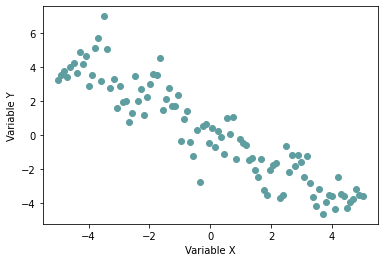

In [3]:
# Definir dataset
X = np.linspace(-5,5,100).reshape(100,1)
y_limpia = np.sin(3 * X) - X
y_ruido = np.random.normal(size=len(X)).reshape(y_limpia.shape)
y = y_limpia + y_ruido

plt.scatter(X, y, color = 'cadetblue')
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.show()

1. Como en casos anteriores, se generan datos aleatorios para ilustrar el funcionamiento de un XGBoost.
2. En este caso se dividen los conjuntos en train + test.
3. A su vez, el conjunto de train se divide con validación cruzada en tres conjuntos.
4. Utilizando el método `GridSearchCV` se optimizan tres parámetros: `eta`, `lambda` y `max_depth`.
5. Se prueban todas las combinaciones posibles de esos tres parámetros (`GridSearch`) y se valida cada combinación con validación cruzada (`CV`).

In [10]:
# Dividir datasets en entranamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

# Obtener el mejor parámetro de profundidad, entre 3 y 7, usando GridSearchCV y validación cruzada
regr = xgb.XGBRegressor()
params = {"eta" : [0.3,0.5], "lambda" : [0.5,1.0], "max_depth" : [3,7]}
regr_opt = GridSearchCV(regr, params, cv = 3)
regr_opt.fit(X_train, y_train)

print('Los mejores hiperparámetros son: {}'.format(regr_opt.best_params_))

Los mejores hiperparámetros son: {'eta': 0.3, 'lambda': 1.0, 'max_depth': 3}


In [11]:
# Obtener predicciones del juego de entrenamiento y test
y_train_pred = regr_opt.predict(X_train)
y_test_pred = regr_opt.predict(X_test)

print('El índice R2 de los datos en entrenamiento es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('El índice R2 de los datos en evaluación es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

El índice R2 de los datos en entrenamiento es: 1.0
El índice R2 de los datos en evaluación es: 0.58


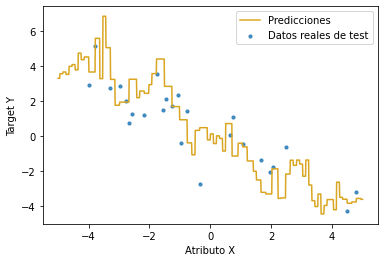

In [14]:
X_fit = np.linspace(-5,5,1000).reshape(1000,1)
y_fit = regr_opt.predict(X_fit)
plt.scatter(X_test, y_test, label = "Datos reales de test", alpha = 0.8, s = 10)
plt.plot(X_fit, y_fit, label = "Predicciones", color = "goldenrod")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

Conviene utilizarlo cuando no se necesita interpretabilidad de negocio de cómo funciona el algoritmo, ya que es un modelo de caja negra en el que es difícil su interpretabilidad.